# Bank Customer Churn Prediction

### Part 1: Data and Feature Exploration

Part 1.1: Read in the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#File located in google drive
file_id='1yhi8E3L9zbb9GMfs2pQEhr_A9ACzA01q'
link='http://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)

churn_df = pd.read_csv(csv_url)
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Part 1.2: Feature exploration

In [3]:
# Get Response Variable 
y=churn_df['Exited']

In [4]:
# Check missing value
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

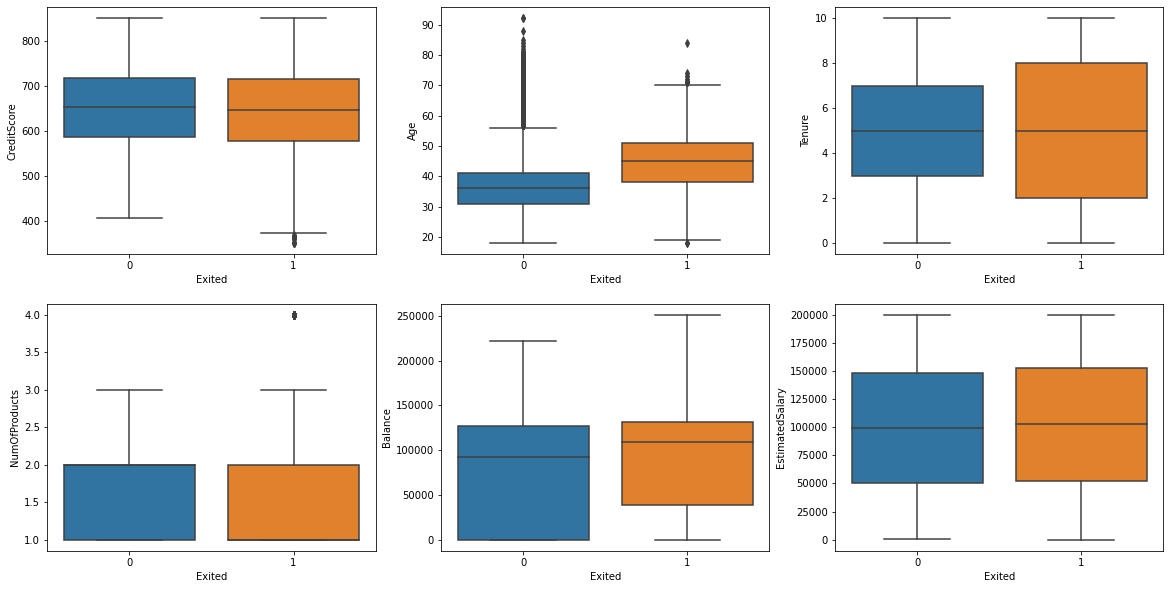

In [5]:
# Numerical Feature: 'CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary'
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[1][2])

In [6]:
# Pearson Correlation Plot
corr_score = churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()
corr_score

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


<AxesSubplot:xlabel='Exited', ylabel='count'>

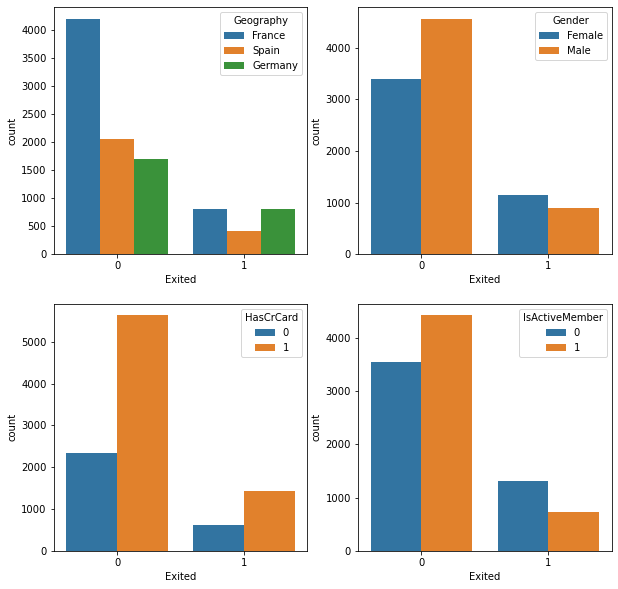

In [7]:
# Categorial Feature
_,axss = plt.subplots(2,2, figsize=[10,10])
sns.countplot(x='Exited', hue='Geography', data=churn_df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1])

### Part 2: Data Preprocessing

In [8]:
# Drop useless feature
drop_feature=['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(drop_feature, axis=1)

In [9]:
# Split categorical var and numerical var
X.dtypes



CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [10]:
cat_cols = X.columns[X.dtypes == 'O']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

Part 2.1: Split dataset

In [11]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.40, stratify = y, random_state=1) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 6000 observation with 10 features
test data has 4000 observation with 10 features


Part 2.2: Encoding

In [12]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)


In [13]:
#  Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

Part 2.3: Standardize and Normalize Data

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Part 3: Model Training and Result Evalution

Part 3.1: Model Training


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Logistic Regression
classifier_logistic = LogisticRegression()

# Naive Bayes
classifier_bayes=GaussianNB()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

Part 3.1.1: Logistics

In [16]:
classifier_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
classifier_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
classifier_logistic.score(X_test, y_test)

0.81025

Part 3.1.2: KNN

In [19]:
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
classifier_KNN.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [21]:
classifier_KNN.score(X_test, y_test)

0.8405

Part 3.1.3: Naive Bayes

In [22]:
classifier_bayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
classifier_bayes.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
classifier_bayes.score(X_test, y_test)

0.81625

Part 3.1.4: Random Forest

In [25]:
classifier_RF.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
classifier_RF.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [27]:
classifier_RF.score(X_test, y_test)

0.8635

Part 3.1.5: Accuracy for different model

In [28]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest','Naive Bayes']
model_list = [classifier_logistic, classifier_KNN, classifier_RF, classifier_bayes]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.81166667 0.81833333 0.80916667 0.79916667 0.81333333]
Model accuracy of Logistic Regression is 0.8103333333333333
[0.835      0.82916667 0.8325     0.83416667 0.825     ]
Model accuracy of KNN is 0.8311666666666666
[0.86666667 0.86416667 0.86       0.85666667 0.84666667]
Model accuracy of Random Forest is 0.8588333333333333
[0.8175     0.82166667 0.8125     0.81833333 0.81333333]
Model accuracy of Naive Bayes is 0.8166666666666667


Part 3.2: Use Grid search to find Hyperparameter

In [29]:
#Loss/cost function --> (wx + b - y) ^2 + ƛ * |w| --> ƛ is a hyperparameter
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

Part 3.2.1: Find Hyperparameter for Logistic Regression

In [30]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
# the best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)

Best score: 0.8106666666666665
Best parameters set:
C:0.2
penalty:l2


In [32]:
# best model
best_LR_model = Grid_LR.best_estimator_

In [33]:
best_LR_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
best_LR_model.score(X_test, y_test)

0.81

In [35]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)

In [36]:
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score'))

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


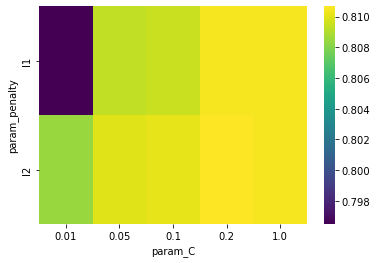

In [37]:
_ = sns.heatmap(res, cmap='viridis')

Part 3.2.2: Find Hyperparameter: KNN

In [38]:
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.8375
Best parameters set:
n_neighbors:9


In [40]:
best_KNN_model = Grid_KNN.best_estimator_

Part 3.2.3: Find Hyperparameter for ramdom forest

In [41]:
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [42]:
print_grid_search_metrics(Grid_RF)

Best score: 0.8630000000000001
Best parameters set:
max_depth:10
n_estimators:80


In [43]:
best_RF_model = Grid_RF.best_estimator_

In [44]:
best_RF_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Part 3.3: Model Evaluation - Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [46]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test))),
    ("Naive Bayes", confusion_matrix(y_test, classifier_bayes.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.86175
precision is: 0.795045045045045
recall is: 0.4331288343558282

Logistic Regression
Accuracy is: 0.81
precision is: 0.6053639846743295
recall is: 0.19386503067484662

K nearest neighbor
Accuracy is: 0.83825
precision is: 0.6971830985915493
recall is: 0.36441717791411044

Naive Bayes
Accuracy is: 0.81625
precision is: 0.578125
recall is: 0.36319018404907977



Part 3.4: Model Evaluation - ROC & AUC

Part 3.4.1: ROC of Logistic Regression Model

In [47]:
from sklearn.metrics import roc_curve
from sklearn import metrics

y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

In [48]:
best_LR_model.predict_proba(X_test)

array([[0.85236421, 0.14763579],
       [0.79347477, 0.20652523],
       [0.81626066, 0.18373934],
       ...,
       [0.93864849, 0.06135151],
       [0.91723309, 0.08276691],
       [0.75769012, 0.24230988]])

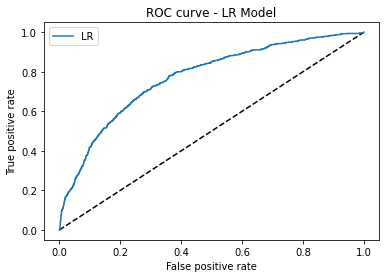

In [49]:
# ROC curve of Logistic Regression result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [50]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.7702524294285906

Part 3.4.2: ROC of Random Forest Model

In [51]:
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [52]:
best_RF_model.predict_proba(X_test)

array([[0.94492226, 0.05507774],
       [0.81563754, 0.18436246],
       [0.93549019, 0.06450981],
       ...,
       [0.81789438, 0.18210562],
       [0.90520493, 0.09479507],
       [0.41943495, 0.58056505]])

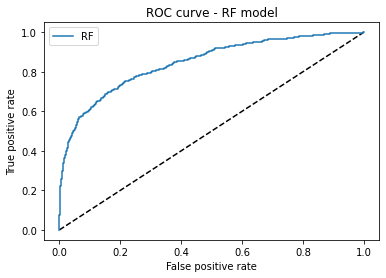

In [53]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [54]:
# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8459901185580414

Part 3.5: Feature Importance of Random Forest

In [55]:
X_RF = X.copy()
X_RF = OneHotEncoding(X_RF, enc_ohe, ['Geography'])
X_RF['Gender'] = enc_oe.transform(X_RF[['Gender']])

In [56]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2428
EstimatedSalary : 0.1453
CreditScore : 0.1446
Balance : 0.1427
NumOfProducts : 0.1296
Tenure : 0.0817
IsActiveMember : 0.0383
Geography_Germany : 0.0205
Gender : 0.0182
HasCrCard : 0.0178
